# YOLO on Liquor Synthetic Dataset

__By: Chengyi (Jeff) Chen__

---
## Last model saved in Checkpoint

In [22]:
from darkflow.net.build import TFNet
import cv2
import numpy as np
import matplotlib.pyplot as plt

options = {"model": "cfg/tiny-yolo-voc-liquor.cfg", 
           "load": -1, 
           "threshold": 0.001}

tfnet = TFNet(options)

imgcv = cv2.imread("./sample_img/liquor2.jpg")
# imgcv = cv2.imread("./sample_img/liquor2.jpg")
results = tfnet.return_predict(imgcv)
print(results)

Parsing cfg/tiny-yolo-voc-liquor.cfg
Loading None ...
Finished in 0.0003380775451660156s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

In [23]:
max_confidence = 0
box = None
for x in results:
    if x['confidence'] > max_confidence:
        max_confidence = x['confidence']
        box = x

In [24]:
max_confidence

0.008446502

In [25]:
box

{'bottomright': {'x': 83, 'y': 411},
 'confidence': 0.008446502,
 'label': 'liquor',
 'topleft': {'x': 0, 'y': 386}}

In [26]:
colors = [tuple(255 * np.random.rand(3)) for _ in range(10)]

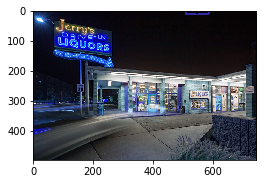

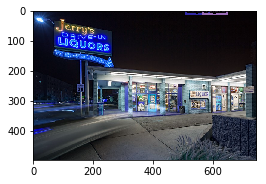

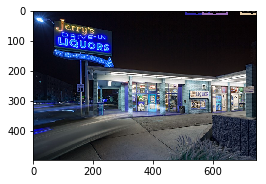

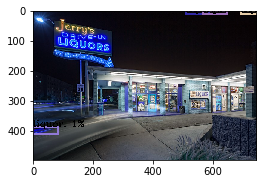

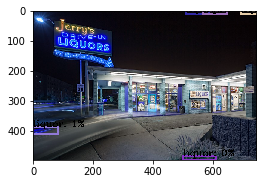

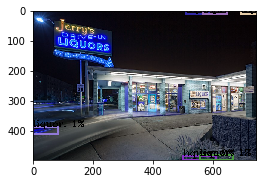

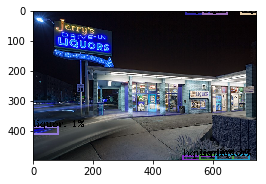

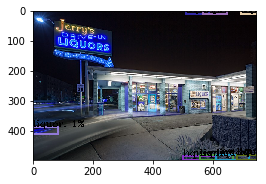

In [27]:
for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
    text = '{}: {:.0f}%'.format(label, confidence * 100)
    imgcv = cv2.rectangle(imgcv, tl, br, color, 5)
    imgcv = cv2.putText(imgcv, text, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
#     cv2.imwrite('./sample_img/out/liquor_out.jpg', imgcv)
    plt.figure(figsize=(4,4))
    plt.imshow(imgcv);

## Printing graph saved in .pb file

In [28]:
import tensorflow as tf
from tensorflow.python.platform import gfile
GRAPH_PB_PATH = './built_graph/tiny-yolo-voc-liquor.pb'
with tf.Session() as sess:
    print("load graph")
    with gfile.FastGFile(GRAPH_PB_PATH,'rb') as f:
        graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    sess.graph.as_default()
    tf.import_graph_def(graph_def, name='')
    graph_nodes=[n for n in graph_def.node]
    names = []
    for t in graph_nodes:
        names.append(t.name)
    print(names)

load graph
['input', 'Pad/paddings', 'Pad', '0-convolutional/filter', '0-convolutional', 'sub/y', 'sub', 'truediv/y', 'truediv', 'mul/y', 'mul', 'BiasAdd/bias', 'BiasAdd', 'mul_1/x', 'mul_1', '1-leaky', '2-maxpool', 'Pad_1/paddings', 'Pad_1', '3-convolutional/filter', '3-convolutional', 'sub_1/y', 'sub_1', 'truediv_1/y', 'truediv_1', 'mul_2/y', 'mul_2', 'BiasAdd_1/bias', 'BiasAdd_1', 'mul_3/x', 'mul_3', '4-leaky', '5-maxpool', 'Pad_2/paddings', 'Pad_2', '6-convolutional/filter', '6-convolutional', 'sub_2/y', 'sub_2', 'truediv_2/y', 'truediv_2', 'mul_4/y', 'mul_4', 'BiasAdd_2/bias', 'BiasAdd_2', 'mul_5/x', 'mul_5', '7-leaky', '8-maxpool', 'Pad_3/paddings', 'Pad_3', '9-convolutional/filter', '9-convolutional', 'sub_3/y', 'sub_3', 'truediv_3/y', 'truediv_3', 'mul_6/y', 'mul_6', 'BiasAdd_3/bias', 'BiasAdd_3', 'mul_7/x', 'mul_7', '10-leaky', '11-maxpool', 'Pad_4/paddings', 'Pad_4', '12-convolutional/filter', '12-convolutional', 'sub_4/y', 'sub_4', 'truediv_4/y', 'truediv_4', 'mul_8/y', 'mul

__Predicting on graph from ckpt__

Parsing cfg/tiny-yolo-voc-liquor.cfg
Loading None ...
Finished in 4.982948303222656e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?,

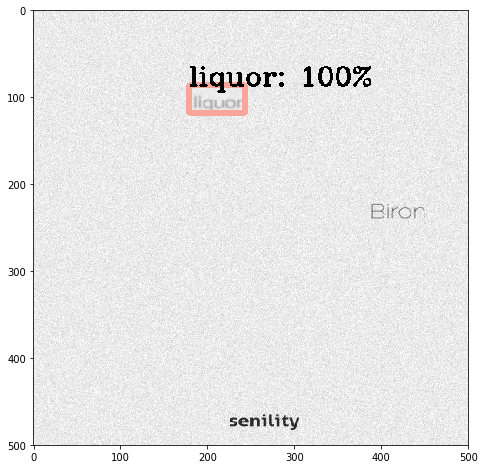

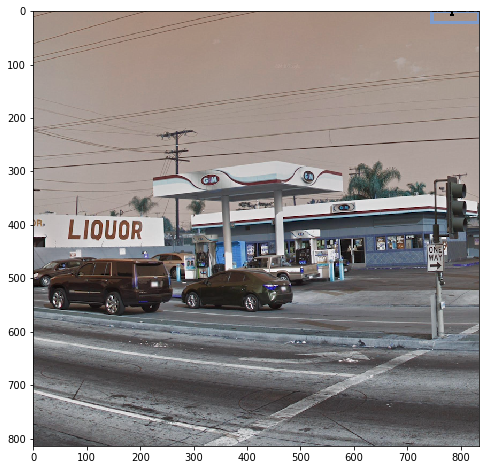

In [32]:
def best_prediction():
#     options = {"pbLoad": "./built_graph/tiny-yolo-voc-liquor.pb", 
#                "metaLoad": "./built_graph/tiny-yolo-voc-liquor.meta",
#                "threshold": 0.5}
    
    options = {"model": "cfg/tiny-yolo-voc-liquor.cfg", 
               "load": -1,
               "threshold": 0.01}

    tfnet = TFNet(options)

    imgcv1 = cv2.imread("./sample_img/positive2966.jpg")
    imgcv2 = cv2.imread("./sample_img/liquor1.png")
    
    for imgcv in [imgcv1, imgcv2]:
        results = tfnet.return_predict(imgcv)

        colors = [tuple(255 * np.random.rand(3)) for _ in range(10)]

        max_confidence = 0
        box = None
        for x in results:
            if x['confidence'] > max_confidence:
                max_confidence = x['confidence']
                box = x

    #     print(results)

        tl = (box['topleft']['x'], box['topleft']['y'])
        br = (box['bottomright']['x'], box['bottomright']['y'])
        label = box['label']
        confidence = box['confidence']
        text = '{}: {:.0f}%'.format(label, confidence * 100)
        imgcv = cv2.rectangle(imgcv, tl, br, colors[0], 5)
        imgcv = cv2.putText(imgcv, text, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
        plt.figure(figsize=(8,8))
        plt.imshow(imgcv);
    
best_prediction()